<a href="https://colab.research.google.com/github/SaiDeepika2004/Alzheimers_disease_detection/blob/main/LAST_FINAL_PROJECT_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imbalanced-learn

In [2]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

Selected features: ['Age', 'EducationLevel', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']
Epoch 1/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.7165 - loss: 3.5128 - val_accuracy: 0.5099 - val_loss: 3.8160 - learning_rate: 5.0000e-04
Epoch 2/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8408 - loss: 3.2560 - val_accuracy: 0.7328 - val_loss: 3.3060 - learning_rate: 5.0000e-04
Epoch 3/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8720 - loss: 3.1030 - val_accuracy: 0.8879 - val_loss: 2.9252 - learning_rate: 5.0000e-04
Epoch 4/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8936 - loss: 2.9700 - val_accuracy: 0.9163 - val_loss: 2.8192 - learning_rate: 5.0000e-04
Epoch 5/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/ste

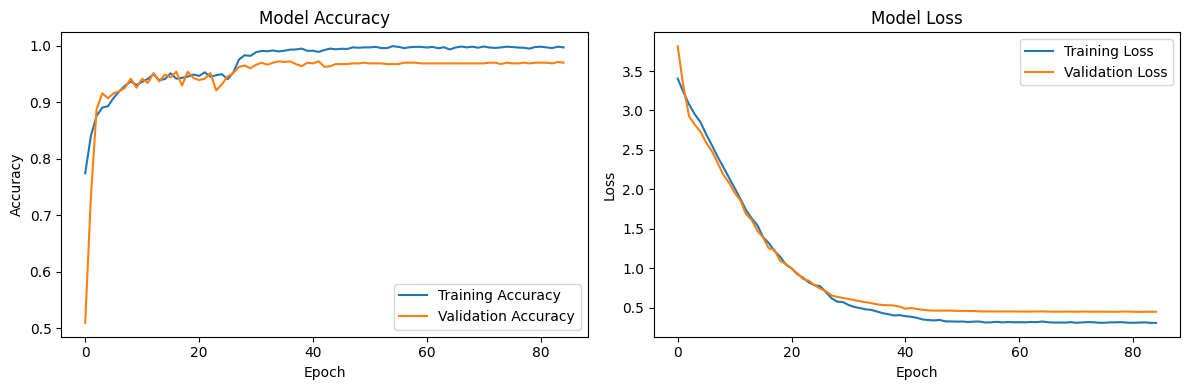

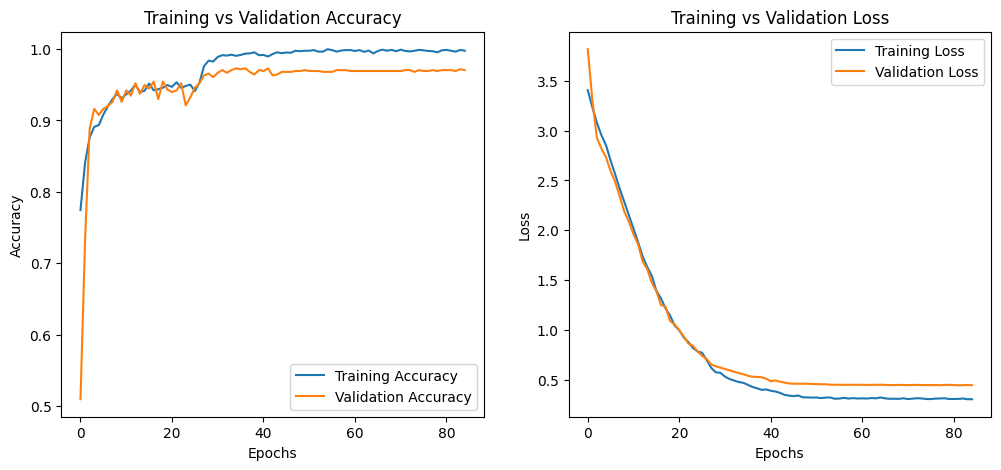

Final Training Accuracy: 0.9975
Final Validation Accuracy: 0.9704
Accuracy Gap: 0.0271 (High gap may indicate overfitting)
Final Training Loss: 0.3049
Final Validation Loss: 0.4458
Loss Gap: 0.1409 (Positive gap may indicate overfitting)


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, Input, Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("alzheimers_disease_data_expanded_3 (3).csv")

# Drop non-relevant columns
df.drop(columns=["PatientID", "DoctorInCharge"], inplace=True)

# Encode categorical variables
le = LabelEncoder()
categorical_columns = ["Gender", "Ethnicity"]
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Feature Selection using Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5)
dt.fit(X_train, y_train)
dt_importances = dt.feature_importances_

# Feature Selection using Random Forest with optimized parameters
rf = RandomForestClassifier(
    n_estimators=1000,
    random_state=42,
    max_depth=20,
    min_samples_split=4,
    min_samples_leaf=2,
    n_jobs=-1,
    class_weight='balanced'
)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
# Select top features (increased to 20)
dt_top_features = set(np.argsort(dt_importances)[-20:])
rf_top_features = set(np.argsort(rf_importances)[-20:])
selected_features = list(dt_top_features.intersection(rf_top_features))

# Print selected feature names
feature_names = X.columns[selected_features]
print("Selected features:", feature_names.tolist())
# Use .loc to select features from the DataFrame before scaling
X_train_selected = X_train[:, selected_features].astype(np.float32) # convert to float32
X_test_selected = X_test[:, selected_features].astype(np.float32)  # convert to float32


# Reshape for CNN input
X_train_selected_cnn = X_train_selected.reshape(X_train_selected.shape[0], X_train_selected.shape[1], 1)
X_test_selected_cnn = X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1)


# CNN Model with enhanced architecture
cnn_input = Input(shape=(X_train_selected.shape[1], 1))
cnn_layer = Conv1D(filters=256, kernel_size=3, activation='relu', kernel_regularizer=l2(0.0005))(cnn_input)
cnn_layer = BatchNormalization()(cnn_layer)
cnn_layer = Conv1D(filters=512, kernel_size=3, activation='relu', kernel_regularizer=l2(0.0005))(cnn_layer)
cnn_layer = BatchNormalization()(cnn_layer)
cnn_layer = Conv1D(filters=256, kernel_size=3, activation='relu', kernel_regularizer=l2(0.0005))(cnn_layer)
cnn_layer = BatchNormalization()(cnn_layer)
cnn_layer = Flatten()(cnn_layer)
cnn_layer = Dense(1024, activation='relu', kernel_regularizer=l2(0.0005))(cnn_layer)
cnn_layer = BatchNormalization()(cnn_layer)
cnn_layer = Dropout(0.3)(cnn_layer)

# ANN Model with enhanced architecture
ann_input = Input(shape=(X_train_selected.shape[1],))
ann_layer = Dense(1024, activation='relu', kernel_regularizer=l2(0.0005))(ann_input)
ann_layer = BatchNormalization()(ann_layer)
ann_layer = Dropout(0.3)(ann_layer)
ann_layer = Dense(512, activation='relu', kernel_regularizer=l2(0.0005))(ann_layer)
ann_layer = BatchNormalization()(ann_layer)
ann_layer = Dropout(0.3)(ann_layer)
ann_layer = Dense(256, activation='relu', kernel_regularizer=l2(0.0005))(ann_layer)
ann_layer = BatchNormalization()(ann_layer)
ann_layer = Dropout(0.3)(ann_layer)

# Merge CNN and ANN with enhanced architecture
merged_layer = Concatenate()([cnn_layer, ann_layer])
merged_layer = Dense(1024, activation='relu', kernel_regularizer=l2(0.0005))(merged_layer)
merged_layer = BatchNormalization()(merged_layer)
merged_layer = Dropout(0.3)(merged_layer)
merged_layer = Dense(512, activation='relu', kernel_regularizer=l2(0.0005))(merged_layer)
merged_layer = BatchNormalization()(merged_layer)
merged_layer = Dropout(0.3)(merged_layer)
merged_layer = Dense(256, activation='relu', kernel_regularizer=l2(0.0005))(merged_layer)
merged_layer = BatchNormalization()(merged_layer)
merged_layer = Dropout(0.3)(merged_layer)
output_layer = Dense(1, activation='sigmoid')(merged_layer)

# Create Final Model with modified optimizer
final_model = Model(inputs=[cnn_input, ann_input], outputs=output_layer)
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)
final_model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Modified callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=50,  # Increased patience
    restore_best_weights=True,
    mode='max',
    min_delta=0.0001
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.1,
    patience=10,
    min_lr=0.000001,
    mode='max',
    min_delta=0.0001
)

# Train with modified parameters
history = final_model.fit(
    [X_train_selected_cnn, X_train_selected],
    y_train,
    epochs=100,  # Increased epochs
    batch_size=16,  # Reduced batch size
    validation_data=([X_test_selected_cnn, X_test_selected], y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1,
    class_weight={0: 1, 1: 1.5}  # Add class weights if imbalanced
)

# Evaluate Model
y_pred = final_model.predict([X_test_selected_cnn, X_test_selected])
y_pred_classes = (y_pred > 0.5).astype(int)

# Print detailed evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# Calculate and print final accuracy
loss, accuracy = final_model.evaluate([X_test_selected_cnn, X_test_selected], y_test, verbose=0)
print(f'\nFinal Test Accuracy: {accuracy * 100:.2f}%')

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt

# Extract training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Print accuracy and loss gaps
accuracy_gap = train_acc[-1] - val_acc[-1]
loss_gap = val_loss[-1] - train_loss[-1]

print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Accuracy Gap: {accuracy_gap:.4f} (High gap may indicate overfitting)")

print(f"Final Training Loss: {train_loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")
print(f"Loss Gap: {loss_gap:.4f} (Positive gap may indicate overfitting)")



Selected Features by Decision Tree:
+--------------------------+
| Feature Name             |
+==========================+
| Age                      |
+--------------------------+
| EducationLevel           |
+--------------------------+
| BMI                      |
+--------------------------+
| Smoking                  |
+--------------------------+
| AlcoholConsumption       |
+--------------------------+
| PhysicalActivity         |
+--------------------------+
| DietQuality              |
+--------------------------+
| SleepQuality             |
+--------------------------+
| SystolicBP               |
+--------------------------+
| DiastolicBP              |
+--------------------------+
| CholesterolTotal         |
+--------------------------+
| CholesterolLDL           |
+--------------------------+
| CholesterolHDL           |
+--------------------------+
| CholesterolTriglycerides |
+--------------------------+
| MMSE                     |
+--------------------------+
| Func

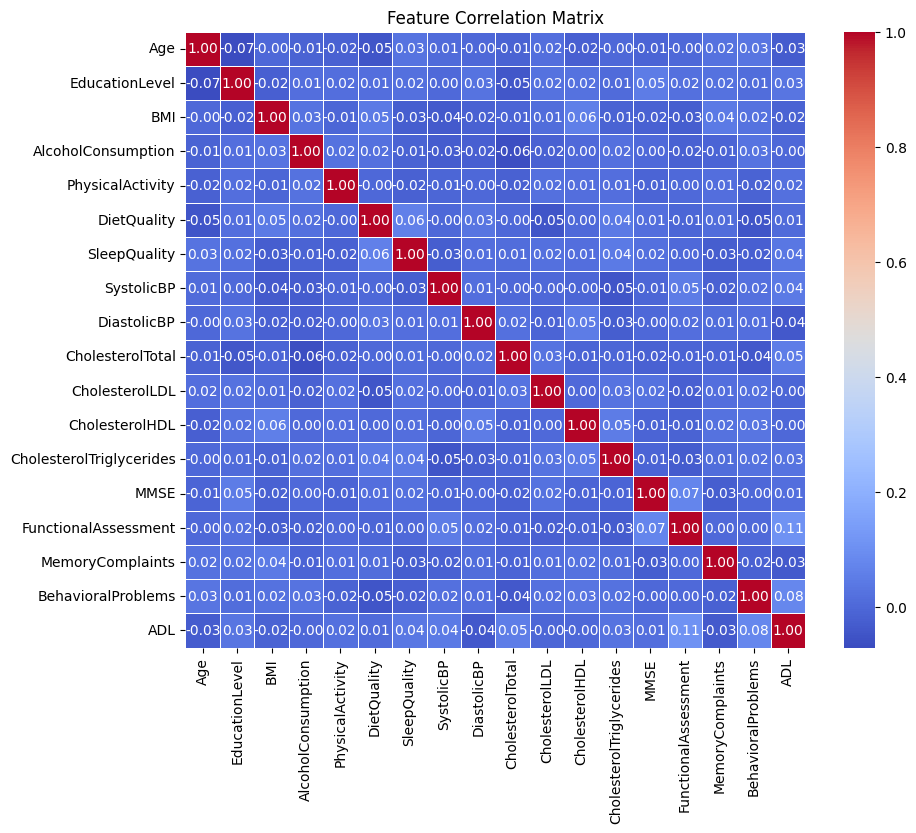

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7829 - loss: 0.9193 - val_accuracy: 0.8522 - val_loss: 0.8400
Epoch 2/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8853 - loss: 0.6931 - val_accuracy: 0.8768 - val_loss: 0.6648
Epoch 3/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9070 - loss: 0.5962 - val_accuracy: 0.9015 - val_loss: 0.6114
Epoch 4/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9274 - loss: 0.5639 - val_accuracy: 0.9273 - val_loss: 0.5781
Epoch 5/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9358 - loss: 0.4986 - val_accuracy: 0.9372 - val_loss: 0.5459
Epoch 6/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9391 - loss: 0.4865 - val_accuracy: 0.9298 - val_loss: 0.5520
Epoch 7/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9432 - loss: 0.4509 - val_accuracy: 0.9372 - val_loss: 0.5315
Epoch 8/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9484 - loss: 0.4383 - val_accuracy: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


203/203 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6709 - loss: 0.8617 - val_accuracy: 0.8448 - val_loss: 0.6206
Epoch 2/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8139 - loss: 0.6231 - val_accuracy: 0.8645 - val_loss: 0.5359
Epoch 3/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8224 - loss: 0.5845 - val_accuracy: 0.8768 - val_loss: 0.5063
Epoch 4/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8461 - loss: 0.5444 - val_accuracy: 0.8953 - val_loss: 0.4786
Epoch 5/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8405 - loss: 0.5297 - val_accuracy: 0.8953 - val_loss: 0.4587
Epoch 6/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8552 - loss: 0.5147 - val_accuracy: 0.8904 - val_loss: 0.4610
Epoch 7/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8748 - loss: 0.4590 - val_accuracy: 0.8892 - val_loss: 0.4459
Epoch 8/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8733 - loss: 0.4662 - val_accuracy: 0.8978 - val_

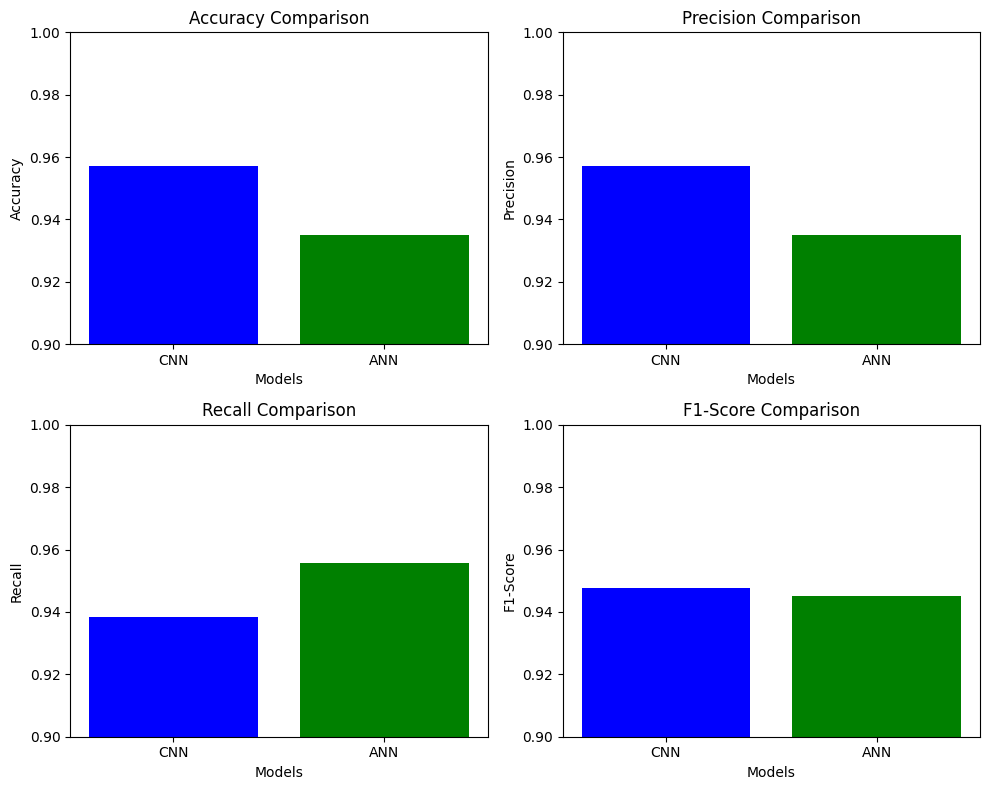

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, Input, Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv("alzheimers_disease_data_expanded_3 (3).csv")

# Drop non-relevant columns
df.drop(columns=["PatientID", "DoctorInCharge"], inplace=True)

# Encode categorical variables
le = LabelEncoder()
categorical_columns = ["Gender", "Ethnicity"]
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Feature Selection using Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5)
dt.fit(X_train, y_train)
dt_importances = dt.feature_importances_
dt_top_features = set(np.argsort(dt_importances)[-20:])
print("\nSelected Features by Decision Tree:")
print(tabulate([[X.columns[i]] for i in dt_top_features], headers=["Feature Name"], tablefmt="grid"))

# Feature Selection using Random Forest
rf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=20, min_samples_split=4, min_samples_leaf=2, n_jobs=-1, class_weight='balanced')
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
rf_top_features = set(np.argsort(rf_importances)[-20:])
print("\nSelected Features by Random Forest:")
print(tabulate([[X.columns[i]] for i in rf_top_features], headers=["Feature Name"], tablefmt="grid"))

# Common features from DT and RF
selected_features = list(dt_top_features.intersection(rf_top_features))
print("\nFinal Selected Features (DT AND RF):")
print(tabulate([[X.columns[i]] for i in selected_features], headers=["Feature Name"], tablefmt="grid"))

X_train_selected = X_train[:, selected_features].astype(np.float32)
X_test_selected = X_test[:, selected_features].astype(np.float32)

# Correlation Matrix
selected_feature_names = X.columns[selected_features]
correlation_matrix = pd.DataFrame(X_train_selected, columns=selected_feature_names).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Define and Train CNN Model
cnn_model = Sequential([
    Conv1D(128, 3, activation='relu', kernel_regularizer=l2(0.0005), input_shape=(X_train_selected.shape[1], 1)),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_selected.reshape(X_train_selected.shape[0], X_train_selected.shape[1], 1), y_train, epochs=50, batch_size=16, validation_data=(X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1), y_test))

# Define and Train ANN Model
ann_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.0005), input_shape=(X_train_selected.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])
ann_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_selected, y_train, epochs=50, batch_size=16, validation_data=(X_test_selected, y_test))

# Make Predictions for Each Model
y_pred_cnn = (cnn_model.predict(X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1)) > 0.5).astype(int)
y_pred_ann = (ann_model.predict(X_test_selected) > 0.5).astype(int)

# Collect performance metrics
metrics = {"Model": ["CNN", "ANN"], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}
for model_name, y_pred in zip(metrics["Model"], [y_pred_cnn, y_pred_ann]):
    metrics["Accuracy"].append(precision_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1-Score"].append(f1_score(y_test, y_pred))

# Plot separate bar graphs
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
metrics_names = ["Accuracy", "Precision", "Recall", "F1-Score"]
for ax, metric in zip(axes.flatten(), metrics_names):
    ax.bar(metrics["Model"], metrics[metric], color=['blue', 'green'])
    ax.set_title(f"{metric} Comparison")
    ax.set_xlabel("Models")
    ax.set_ylabel(metric)
    ax.set_ylim(0.9, 1)
plt.tight_layout()
plt.show()


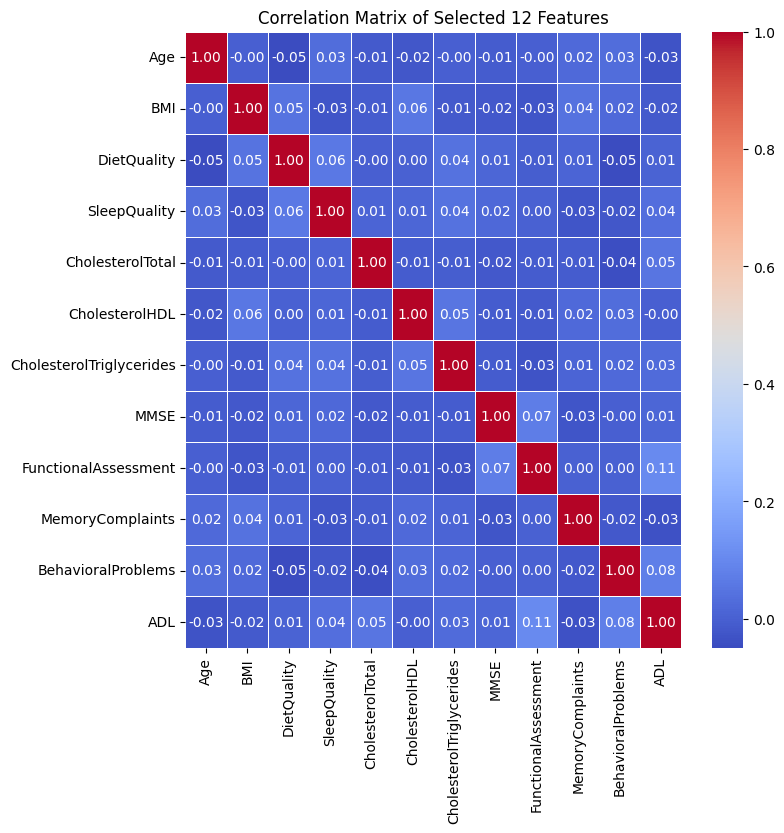

In [10]:
# Extract the names of the 12 selected features
selected_feature_names = X.columns[list(selected_features)]

# Convert the selected features into a DataFrame
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)

# Compute correlation matrix
correlation_matrix = X_train_selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Selected 12 Features")
plt.show()



Selected Features by Decision Tree:
+--------------------------+
| Feature Name             |
+==========================+
| Age                      |
+--------------------------+
| EducationLevel           |
+--------------------------+
| BMI                      |
+--------------------------+
| DietQuality              |
+--------------------------+
| SleepQuality             |
+--------------------------+
| SystolicBP               |
+--------------------------+
| DiastolicBP              |
+--------------------------+
| CholesterolTotal         |
+--------------------------+
| CholesterolHDL           |
+--------------------------+
| CholesterolTriglycerides |
+--------------------------+
| MMSE                     |
+--------------------------+
| FunctionalAssessment     |
+--------------------------+
| MemoryComplaints         |
+--------------------------+
| BehavioralProblems       |
+--------------------------+
| ADL                      |
+--------------------------+

Selec

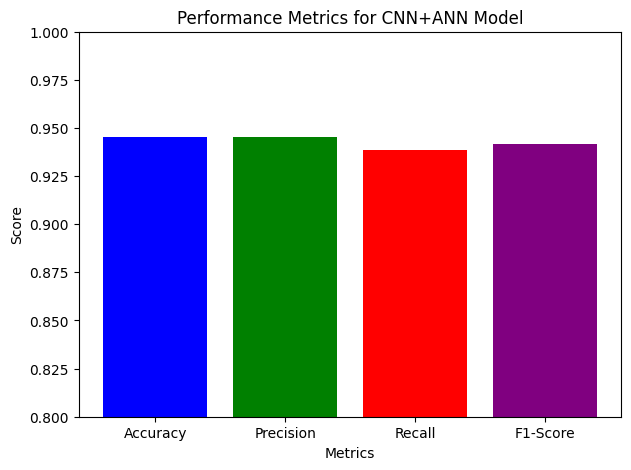

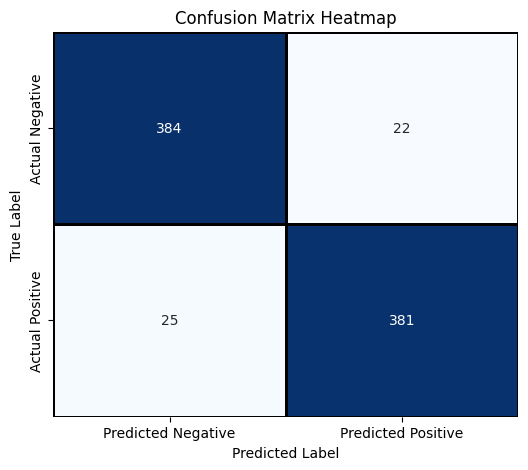

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, Input, Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv("alzheimers_disease_data_expanded_3 (3).csv")

# Drop non-relevant columns
df.drop(columns=["PatientID", "DoctorInCharge"], inplace=True)

# Encode categorical variables
le = LabelEncoder()
categorical_columns = ["Gender", "Ethnicity"]
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Feature Selection using Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5)
dt.fit(X_train, y_train)
dt_importances = dt.feature_importances_
dt_top_features = set(np.argsort(dt_importances)[-15:])
print("\nSelected Features by Decision Tree:")
print(tabulate([[X.columns[i]] for i in dt_top_features], headers=["Feature Name"], tablefmt="grid"))

# Feature Selection using Random Forest
rf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=20, min_samples_split=4, min_samples_leaf=2, n_jobs=-1, class_weight='balanced')
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
rf_top_features = set(np.argsort(rf_importances)[-15:])
print("\nSelected Features by Random Forest:")
print(tabulate([[X.columns[i]] for i in rf_top_features], headers=["Feature Name"], tablefmt="grid"))

# Common features from DT and RF
selected_features = list(dt_top_features.intersection(rf_top_features))
print("\nFinal Selected Features (DT AND RF):")
print(tabulate([[X.columns[i]] for i in selected_features], headers=["Feature Name"], tablefmt="grid"))

X_train_selected = X_train[:, selected_features].astype(np.float32)
X_test_selected = X_test[:, selected_features].astype(np.float32)

# Define and Train CNN+ANN Combined Model
cnn_input = Input(shape=(X_train_selected.shape[1], 1))
cnn_layer = Conv1D(128, 3, activation='relu', kernel_regularizer=l2(0.0005))(cnn_input)
cnn_layer = BatchNormalization()(cnn_layer)
cnn_layer = Flatten()(cnn_layer)
cnn_layer = Dense(512, activation='relu', kernel_regularizer=l2(0.0005))(cnn_layer)
cnn_layer = Dropout(0.4)(cnn_layer)

ann_input = Input(shape=(X_train_selected.shape[1],))
ann_layer = Dense(512, activation='relu', kernel_regularizer=l2(0.0005))(ann_input)
ann_layer = BatchNormalization()(ann_layer)
ann_layer = Dropout(0.4)(ann_layer)
ann_layer = Dense(256, activation='relu', kernel_regularizer=l2(0.0005))(ann_layer)
ann_layer = Dropout(0.4)(ann_layer)

merged_layer = Concatenate()([cnn_layer, ann_layer])
merged_layer = Dense(512, activation='relu', kernel_regularizer=l2(0.0005))(merged_layer)
merged_layer = Dropout(0.4)(merged_layer)
output_layer = Dense(1, activation='sigmoid')(merged_layer)

combined_model = Model(inputs=[cnn_input, ann_input], outputs=output_layer)
combined_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])
combined_model.fit([X_train_selected.reshape(X_train_selected.shape[0], X_train_selected.shape[1], 1), X_train_selected], y_train, epochs=100, batch_size=16, validation_data=([X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1), X_test_selected], y_test))

# Make Predictions for Combined Model
y_pred_combined = (combined_model.predict([X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1), X_test_selected]) > 0.5).astype(int)

# Compute Metrics for Combined Model
accuracy = precision_score(y_test, y_pred_combined)
precision = precision_score(y_test, y_pred_combined)
recall = recall_score(y_test, y_pred_combined)
f1 = f1_score(y_test, y_pred_combined)

accuracy = precision_score(y_test, y_pred_combined)
precision = precision_score(y_test, y_pred_combined)
recall = recall_score(y_test, y_pred_combined)
f1 = f1_score(y_test, y_pred_combined)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1:.2%}")


# Plot All Metrics in One Bar Graph
# metrics = [accuracy, precision, recall, f1]
# metric_names = ["Accuracy", "Precision", "Recall", "F1-Score"]
# plt.figure(figsize=(8, 6))
# plt.bar(metric_names, metrics, color=['blue', 'green', 'red', 'purple'])
# plt.title("Performance Metrics for CNN+ANN Model")
# plt.xlabel("Metrics")
# plt.ylabel("Score")
# plt.ylim(0, 1)
# plt.show()

# Example metric values (replace with your actual values)
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores = [accuracy,precision,recall,f1]  # Use your actual values

# Plot the bar chart
plt.figure(figsize=(7, 5))
colors = ['blue', 'green', 'red', 'purple']
plt.bar(metrics, scores, color=colors)

# Normalize the y-axis for better visibility of differences
plt.ylim(0.8, 1)  # Adjust range based on your values

# Labels and title
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Performance Metrics for CNN+ANN Model")

# Show the plot
plt.show()

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_combined)

# Create a heatmap for the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"], cbar=False, linewidths=1, linecolor='black')

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")

# Show the plot
plt.show()




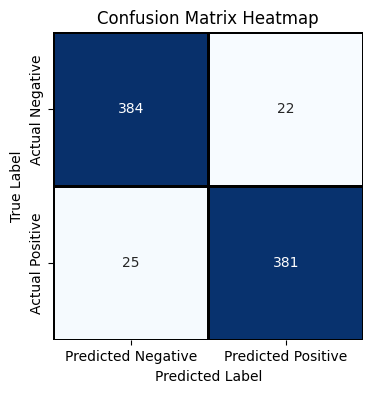

In [7]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_combined)

# Create a heatmap for the Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"], cbar=False, linewidths=1, linecolor='black')

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")

# Show the plot
plt.show()


      Metric     Score
0   Accuracy  0.945409
1  Precision  0.945409
2     Recall  0.938424
3   F1-Score  0.941904


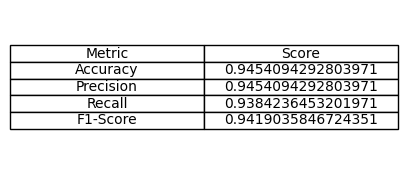

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the metrics (replace these with your actual values)
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy,precision,recall,f1]  # Use your actual values
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Print the table in a clean format
print(df_metrics)

# Optional: Display the table in a figure using matplotlib
fig, ax = plt.subplots(figsize=(5, 2))
ax.axis("tight")
ax.axis("off")
ax.table(cellText=df_metrics.values, colLabels=df_metrics.columns, cellLoc="center", loc="center")

plt.show()


      Decision Tree Features    Random Forest Features  \
0                        Age                       Age   
1             EducationLevel                       BMI   
2                        BMI        AlcoholConsumption   
3                DietQuality          PhysicalActivity   
4               SleepQuality               DietQuality   
5                 SystolicBP              SleepQuality   
6                DiastolicBP          CholesterolTotal   
7           CholesterolTotal            CholesterolLDL   
8             CholesterolHDL            CholesterolHDL   
9   CholesterolTriglycerides  CholesterolTriglycerides   
10                      MMSE                      MMSE   
11      FunctionalAssessment      FunctionalAssessment   
12          MemoryComplaints          MemoryComplaints   
13        BehavioralProblems        BehavioralProblems   
14                       ADL                       ADL   

             Final Features   
0                        Age  
1        

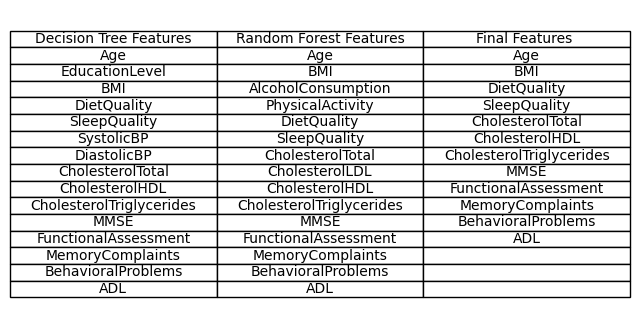

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X is your DataFrame containing feature names
dt_features_final = [X.columns[i] for i in dt_top_features]  # Convert indices to names
rf_features_final = [X.columns[i] for i in rf_top_features]  # Convert indices to names
final_features = [X.columns[i] for i in selected_features]  # Convert indices to names

# Ensure lists are of equal length for proper table alignment
max_len = max(len(dt_features_final), len(rf_features_final), len(final_features))
dt_features_final += [""] * (max_len - len(dt_features_final))
rf_features_final += [""] * (max_len - len(rf_features_final))
final_features += [""] * (max_len - len(final_features))

# Create DataFrame
df_features = pd.DataFrame({
    "Decision Tree Features": dt_features_final,
    "Random Forest Features": rf_features_final,
    "Final Features ": final_features
})

# Print table in console
print(df_features)

# Display table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust figure size if needed
ax.axis("tight")
ax.axis("off")
table = ax.table(cellText=df_features.values, colLabels=df_features.columns, cellLoc="center", loc="center")

# Save table as an image
plt.savefig("features_table.png", dpi=300, bbox_inches="tight")  # High-quality image
plt.show()
